<a href="https://colab.research.google.com/github/EnjyEldesouky/CODSOFT/blob/main/salesadvertise(task3_codsoft)finalipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [ ]:
advertise = pd.read_csv('/content/advertising.csv')

In [39]:
advertise.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [40]:
advertise.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [41]:
advertise.sample()

,TV,Radio,Newspaper,Sales
194,149.7,35.6,6.0,17.3


In [42]:
advertise.shape

(200, 4)

In [43]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## the columns are all float there is no objects

In [44]:
advertise.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [45]:
advertise.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


##there is no null values in our dataset

#DATA VISUALIZATION (EDA)

<Axes: xlabel='Sales', ylabel='Count'>

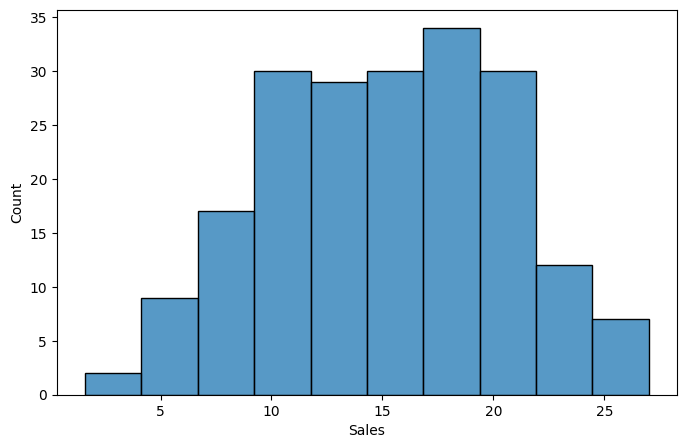

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(x='Sales',data= advertise)

<Axes: xlabel='TV', ylabel='Count'>

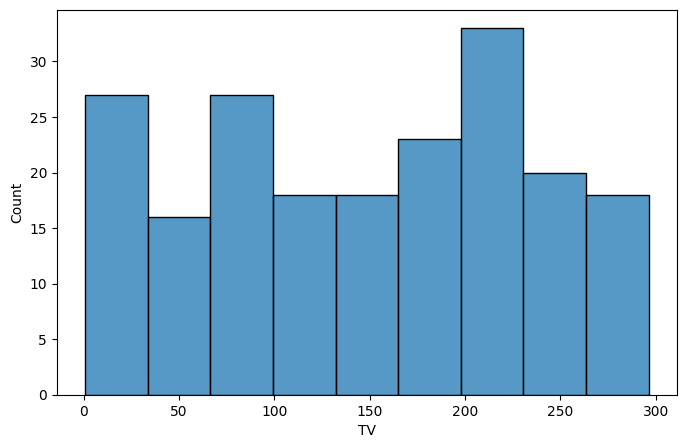

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(x='TV',data= advertise)

<Axes: xlabel='Radio', ylabel='Count'>

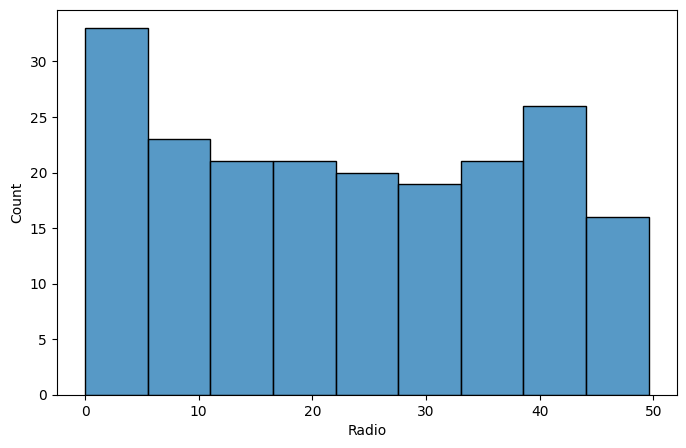

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(x='Radio',data= advertise)

<Axes: xlabel='Newspaper', ylabel='Count'>

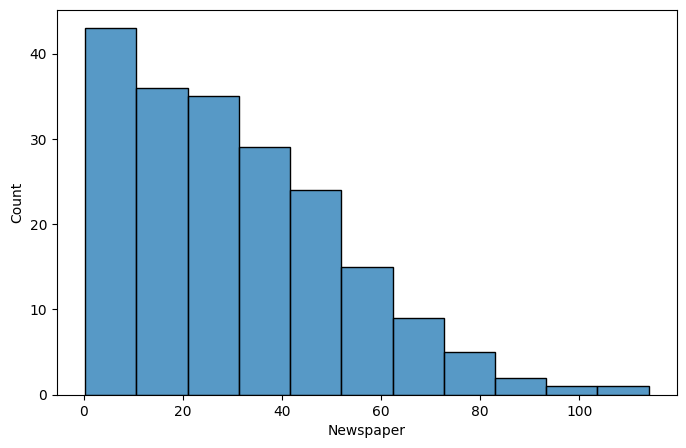

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(x='Newspaper',data= advertise)

In [53]:
advertise['TV'].corr(advertise['Sales'])

0.9012079133023306

##tv is the most channel that can affect ur sales

In [54]:
advertise['Radio'].corr(advertise['Sales'])

0.3496310970076693

In [55]:
advertise['Newspaper'].corr(advertise['Sales'])

0.15796002615492621

In [58]:
advertise['Radio'].corr(advertise['Newspaper'])

0.3541037507611754

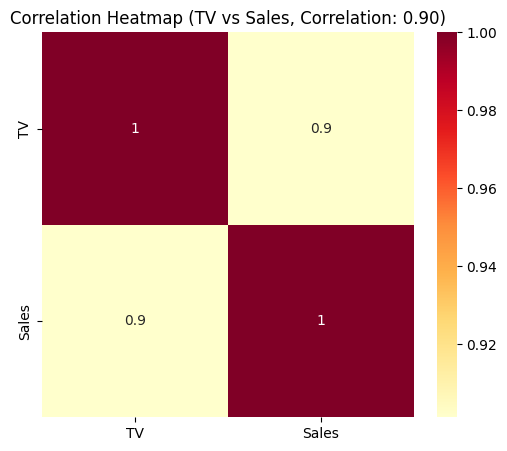

In [61]:
tvsales=advertise['TV'].corr(advertise['Sales'])
plt.figure(figsize=(6, 5))
sns.heatmap(advertise[['TV', 'Sales']].corr(), annot=True, cmap='YlOrRd')
plt.title(f'Correlation Heatmap (TV vs Sales, Correlation: {tvsales:.2f})')
plt.show()

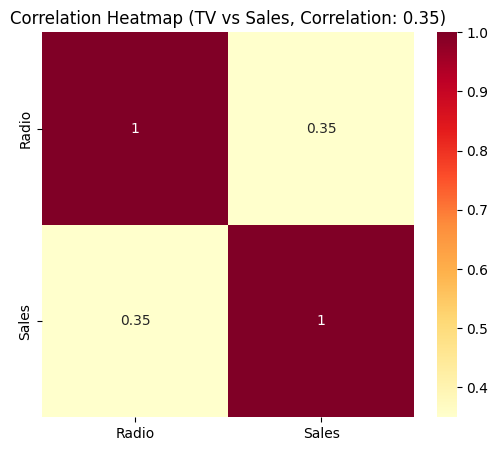

In [64]:
Radiosales=advertise['Radio'].corr(advertise['Sales'])
plt.figure(figsize=(6, 5))
sns.heatmap(advertise[['Radio', 'Sales']].corr(), annot=True, cmap='YlOrRd')
plt.title(f'Correlation Heatmap (TV vs Sales, Correlation: {Radiosales:.2f})')
plt.show()

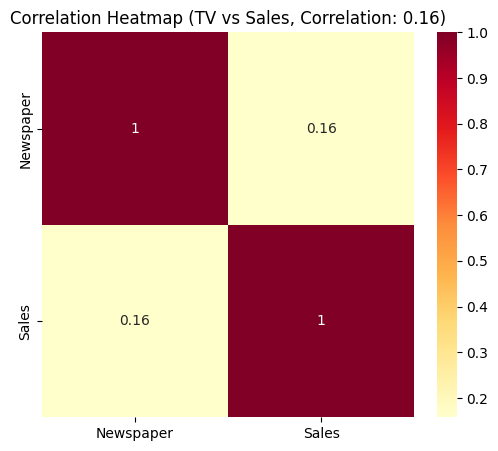

In [66]:
Newspapersales=advertise['Newspaper'].corr(advertise['Sales'])
plt.figure(figsize=(6, 5))
sns.heatmap(advertise[['Newspaper', 'Sales']].corr(), annot=True, cmap='YlOrRd')
plt.title(f'Correlation Heatmap (TV vs Sales, Correlation: {Newspapersales:.2f})')
plt.show()

## WE DEDUCE THAT TV IS THE MOST CHANNEL THAT CORRELATED AND CAN AFFECT OUR SALES COLUMN!!!!!!!!!!!!!!!!!

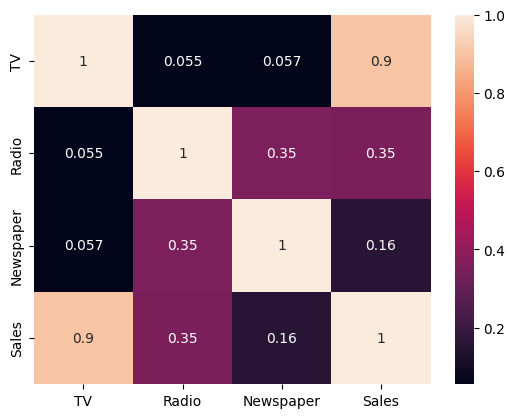

In [75]:
sns.heatmap(advertise.corr(),annot = True)
plt.show()

In [76]:
x=advertise.drop('Sales',axis=1)
y=advertise.Sales

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
x_train.shape

(160, 3)

In [79]:
x_test.shape

(40, 3)

In [80]:
y_train.shape

(160,)

In [81]:
y_test.shape

(40,)

#call model

In [83]:
model = LinearRegression()

#fit model by x_train and y_train

In [85]:
model.fit(x_train,y_train)

LinearRegression()

In [87]:
predict = model.predict(x_test)
predict

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [88]:
#accuracy = accuracy_score(predict,y_test)
#print('accuracy is',accuracy)

ValueError: continuous is not supported

In [89]:
mse = ((predict- y_test) ** 2).mean()
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2.91


  The squared difference between the predicted and actual 'Sales' values is around 2.91 units squared, which provides a quantitative measure of the model's overall predictive accuracy.

In [96]:
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)

In [97]:
print('r2 score is',r2)

r2 score is 0.9059011844150826


In [99]:
print('root mean squared error is',rmse)
print('mean absolute error is',mae)


root mean squared error is 1.7052146229349223
mean absolute error is 1.2748262109549338
